# Reinforcement Learning

The goal of Reinforcement Learning (RL) is to train an agent to make a sequence of decisions by interacting with an environment in order to maximize some notion of cumulative reward. RL is a type of machine learning where an agent learns to achieve a goal in an uncertain, potentially complex environment.

Picture this: you’re playing a video game. You’re the agent, the game’s world is the environment, and your mission is to win many points as possible. Every moment in the game is a chance to make a move, and depending on what you do, the game throws back a new scenario and maybe some rewards (like points for snagging a coin or knocking out an enemy).

This give-and-take keeps going, with the agent (whether it’s you or the algorithm) figuring out which moves bring in the most rewards as time goes on. It’s all about trial and error, where the machine slowly but surely uncovers the best game plan, or policy, to hit its targets.

RL is a bit different from other ways of learning machines, like supervised learning, where a model learns from a set of data that already has the right answers, or unsupervised learning, which is all about spotting patterns in data without clear-cut instructions. With RL, there’s no cheat sheet. The agent learns purely through its adventures — making choices, seeing what happens, and learning from it.

## Key Concepts in Reinforcement Learning

#### Agent
>The learner or the decision maker (model)

#### Environment
>Everything the agent interacts with

#### States (s)
>A state represents the current situation of the agent or configuration of the environment.

The state is a snapshot of the environment at any given moment. It’s the backdrop against which decisions are made. In a video game, a state might show where all the players and objects are on the screen. States can range from something straightforward like a robot’s location on a grid, to something complex like the many factors that describe the stock market at any time.

Mathematically, we often write a state as s ∈ S, where S is the set of all possible states. States can be either discrete (like the spot of a character on a grid) or continuous (like the speed and position of a car).

### Actions (a)
>Actions are the choices or possible moves available to the agent. An action once taken will change the state.

Actions are what an agent can do to change its current state. If we stick with the video game example, actions might include moving left or right, jumping, or doing something specific like shooting. The collection of all actions an agent can take at any point is known as the action space. This space can be discrete, meaning there’s a set number of actions, or continuous, where actions can vary within a range.

In math terms, we express an action as a ∈ A(s), where A represents the action space, and A(s) is the set of all possible actions in state s. Actions can be either discrete or continuous, just like states.

### Rewards (r)
>Rewards are immediate feedback received from the environment following an action.

Rewards are like instant feedback that the agent gets from the environment after it makes a move. Think of them as points that show whether an action was beneficial or not. The agent’s main aim is to collect as many points as possible over time, which means it has to think about both the short-term gains and the long-term impacts of its actions. Just like we mentioned earlier with the dog training analogy when a dog does something good, we give it a treat; if not, there might be a mild telling-off. This idea is pretty much a staple in reinforcement learning.

Mathematically, we describe a reward that comes from making a move a in state s and moving to a new state s′ as R(s, a, s′). Rewards can be either positive (like a treat) or negative (more like a gentle scold), and they’re crucial for helping the agent learn the best actions to take.


### Episodes
>An episode in reinforcement learning is a sequence of steps that starts in an initial state and ends when a terminal state is reached.

Think of an episode in reinforcement learning as a complete run of activity, starting from an initial point and ending when a specific goal is reached or a stopping condition is met. During an episode, the agent goes through a series of steps: it checks out the current situation (state), makes a move (action) based on its strategy (policy), and then gets feedback (reward) and the new situation (next state) from the environment. Episodes neatly package the agent’s experiences in scenarios where tasks have a clear start and finish.

### Policy (π)
>A policy is the strategy that an RL agent employs to decide which actions to take in various states.

In the world of reinforcement learning (RL), a policy is essentially the game plan an agent follows to decide its moves in different situations. It’s like a guidebook that maps out which actions to take when faced with various scenarios. Policies can come in two flavors: deterministic and stochastic.

**Deterministic Policy** \
A deterministic policy is straightforward: for any specific situation, it tells the agent exactly what to do. If you find yourself in a state s, the policy has a predefined action a ready to go. This kind of policy always picks the same action for a given state, making it predictable. You can think of a deterministic policy as a direct function that links states to their corresponding actions

**Stochastic Policy** \
On the flip side, a stochastic policy adds a bit of unpredictability to the mix. Instead of a single action, it gives a set of probabilities for choosing among available actions in a given state. This randomness is crucial for exploring the environment, especially when the agent is still figuring out which actions work best. A stochastic policy is often expressed as a probability distribution over actions given `a` state `s`, symbolized as $π(a ∣ s)$, indicating the likelihood of choosing action `a` when in state `s`

In [2]:
import numpy as np
from dataclasses import dataclass
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
@dataclass
class TinyBoxWorld:
   width: int
   height: int
   start: tuple
   goal: tuple
   current_state: tuple
   obstacles: list
   actions_map: dict

In [4]:
def policy(environment: TinyBoxWorld):
    def is_not_out_of_bound(height, width):
        return 0 <= height < environment.height and 0 <= width < environment.width

    def not_over_any_obstacles(new_state):
        return all((new_state != obstacle).any() for obstacle in environment.obstacles)

    def is_valid_state(new_state):
        return is_not_out_of_bound(new_state[0], new_state[1]) and not_over_any_obstacles(new_state)

    possible_actions = ['up', 'down', 'left', 'right']
    valid_actions = {}
    # Loop through all possible actions 
    for possible_action in possible_actions:
        # take action and move in the direction to get a new state
        next_state = environment.current_state + environment.actions_map[possible_action]
        # validate if the state is valid
        if is_valid_state(next_state):
            # Using Manhattan distance calculation, compute the distance to the goal
            # Its a simple tuple subtraction and then summing the absolute values
            valid_actions[possible_action] = np.sum(np.abs(next_state - environment.goal))
    # Fetch the min value and return the key - here the key is one of the possible_actions
    return min(valid_actions, key=valid_actions.get) if valid_actions else None

# Returns a new state after taking action
def take_action(action: str, actions_map: dict, current_state: tuple):
    return current_state + actions_map[action]

In [5]:
def renderTinyWorld(environment: TinyBoxWorld):
    grid = np.zeros((environment.height, environment.width))
    grid[environment.current_state] = 1  # starting point
    grid[environment.goal] = 3  # goal
    for obstacle in environment.obstacles:
        grid[obstacle] = -1  # obstacles

    plt.imshow(grid, cmap='Pastel1')
    plt.show()

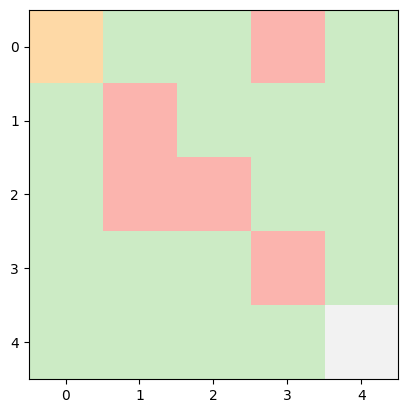

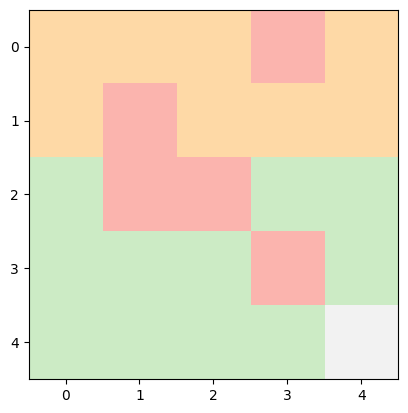

In [6]:
environment = TinyBoxWorld(
    width = 5, 
    height = 5, 
    start = (0,0), 
    goal = (4,4), 
    current_state = (0,0), 
    obstacles = [(0, 3), (1, 1), (2, 2), (2, 1), (3, 3)], 
    actions_map = {'up': np.array([-1, 0]), 'down': np.array([1, 0]), 'left': np.array([0, -1]), 'right': np.array([0, 1])}
)

renderTinyWorld(environment)

action = policy(environment)
environment.current_state = take_action(action, environment.actions_map, environment.current_state)

renderTinyWorld(environment)
